# Clustering Projects - Customer Segmentation

In [1]:
# In K-Means clustering K refers to the number of clusters that you want your data to be grouped into 

In [3]:
# Steps for K-Means clustering
#    1. Randomly assign centroid values for each cluster
#   2. Caluclate the distance(Eucledian) between each data point and centroid values of all clusters.
#   3. Assign the data points to the cluster of the centroid with the shorted distance
#   4. Calculate and update centroid values based on the mean values of the coordinates of all the
#      data points of the corresponding cluster
#   5. Repeat steps 2-4 until new centroid values for all the clusters are differenct from the previous
#      centroid values


In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
dataset = pd.read_csv("Mall_customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.shape

(200, 5)

C:\Users\aryan\AppData\Local\Temp\ipykernel_17936\3169252799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Annual Income (k$)"], kde = False, bins = 50)


<AxesSubplot:xlabel='Annual Income (k$)'>

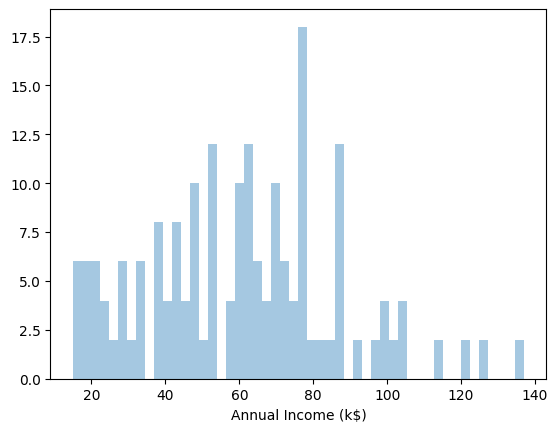

In [8]:
sns.distplot(dataset["Annual Income (k$)"], kde = False, bins = 50)

In [9]:
# The output shows that most of the customers have income between 60 and 90K per year.

C:\Users\aryan\AppData\Local\Temp\ipykernel_17936\2395893985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Spending Score (1-100)'], kde=False, bins=50, color='red')


<AxesSubplot:xlabel='Spending Score (1-100)'>

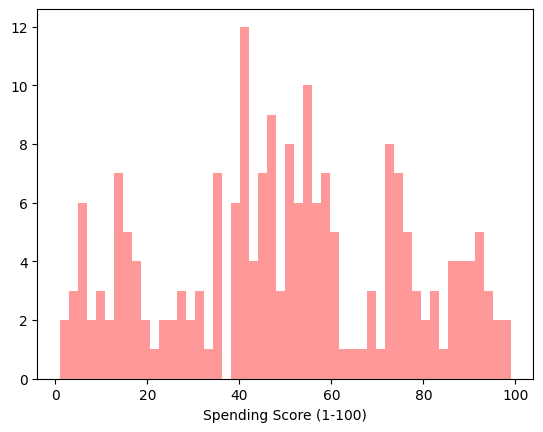

In [10]:
sns.distplot(dataset['Spending Score (1-100)'], kde=False, bins=50, color='red')

In [11]:
# The output shows that most of the customers have a spending score between 40 and 60

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

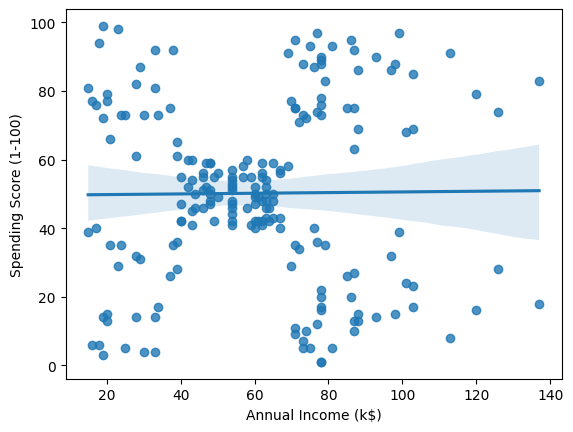

In [12]:
sns.regplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = dataset)

In [13]:
# From the straight line in the above output, you can infer that there is no linear relationship
# between annual income and spending

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

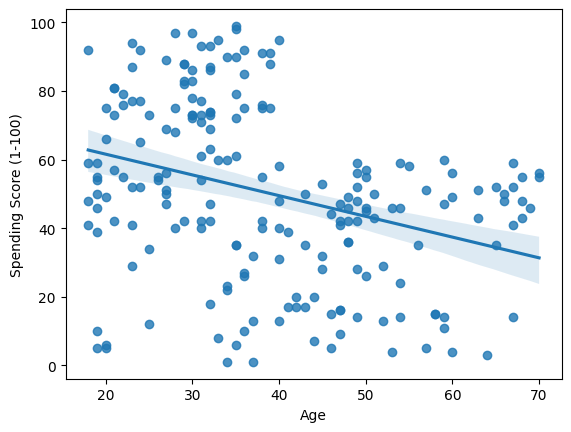

In [14]:
# Plotting regression plot for age and spending score

sns.regplot(x = 'Age', y = 'Spending Score (1-100)', data = dataset)

In [15]:
# The above output confirms an inverse linear relationship between age and spending score.
# It can be inferred from the output that young people have higher spending compared to older people

In [18]:
dataset = dataset.filter(['Annual Income (k$)', 'Spending Score (1-100)'], axis = 1)

In [19]:
dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
km_model = KMeans(n_clusters=4)
km_model.fit(dataset)

KMeans(n_clusters=4)

In [21]:
print(km_model.cluster_centers_)

[[86.53846154 82.12820513]
 [48.26       56.48      ]
 [87.         18.63157895]
 [26.30434783 20.91304348]]


In [22]:
print(km_model.labels_)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


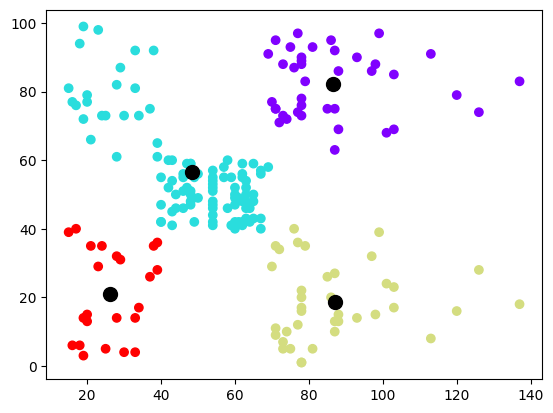

In [24]:
# print the data points

plt.scatter(dataset.values[:,0], dataset.values[:,1], c = km_model.labels_, cmap = 'rainbow')

# print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s = 100, c = 'black')

In [25]:
# There is a way to find the ideal number of clusters. The method is known as the elbow method

# In the elbow method, the value of inertia obtained by training K-Means clusters with different
# number of K is plotted on a graph

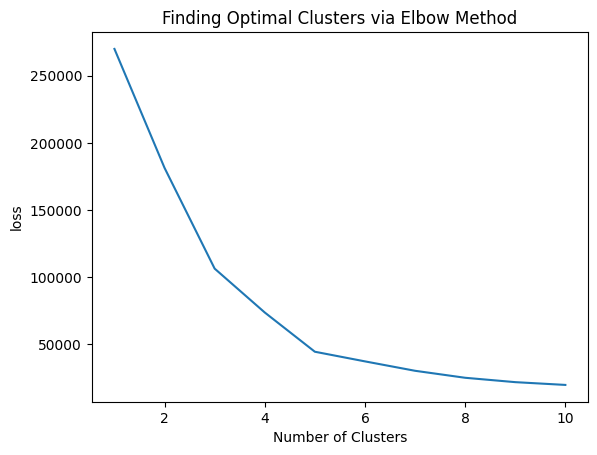

In [26]:
loss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(dataset)
    loss.append(km.inertia_)

plt.plot(range(1, 11), loss)
plt.title("Finding Optimal Clusters via Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel('loss')
plt.show()

In [27]:
km_model = KMeans(n_clusters=5)
km_model.fit(dataset)

KMeans(n_clusters=5)

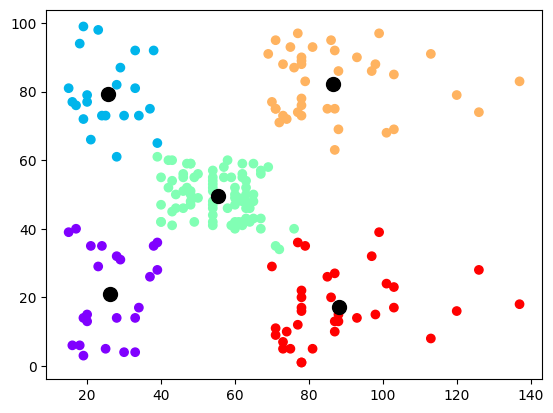

In [28]:
# print the data points

plt.scatter(dataset.values[:,0], dataset.values[:,1], c = km_model.labels_, cmap = 'rainbow')

# print the centroids
plt.scatter(km_model.cluster_centers_[:,0], km_model.cluster_centers_[:,1], s = 100, c = 'black')

In [29]:
print(km_model.cluster_centers_)

[[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


In [32]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['cluster'] = km_model.labels_
cluster_map

,data_index,cluster
0,0,0
1,1,1
2,2,0
3,3,1
4,4,0
...,...,...
195,195,3
196,196,4
197,197,3
198,198,4


In [33]:
cluster_map = cluster_map[cluster_map.cluster == 0]
cluster_map.head()

,data_index,cluster
0,0,0
2,2,0
4,4,0
6,6,0
8,8,0


In [34]:
# These are the customers who have high incomes and high spending and these customers should be targeted during
# marketing campaigns